# 클러스터링 최적 모델 찾기

In [ ]:
#모델 경로를 불러오기 위해 필요한 코드입니다.
import os
import sys
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname(os.path.abspath(os.path.dirname('model'))))))

import model.model as md

#모델 불러오기
model = md.recommendation()

In [ ]:
#모델 불러오기
model.get_embedding_matrix('..\\..\\embeddings\\embedding_dict(wiki).pickle', vector_length=300)

In [ ]:
#test data 생성
import pickle

with open('..\\data\\test_li(wiki).pickle', 'rb') as f:
    test_li = pickle.load(f)

In [ ]:
#유저 vector 리스트 제작
vectors = []
for i, p in test_li:
    vectors.append(model.get_vector(p))

vectors

[array([-9.23383877e-02,  5.98351732e-02, -2.03351120e-01,  1.10142287e-01,
        -1.35574207e-01,  3.40824589e-01,  2.71062054e-01,  1.09349117e-03,
        -7.81573402e-02,  2.41012274e-01,  1.57374976e-01,  2.29249812e-01,
        -4.45340157e-02,  3.68005179e-02,  1.12915326e-01, -2.64677269e-01,
         1.41913613e-01,  1.98053618e-01,  2.20286764e-01, -4.16368246e-05,
        -1.44269011e-01,  2.81339013e-01, -2.14612704e-01, -2.38196671e-02,
         4.61786248e-02,  1.23904153e-01, -1.44250713e-01, -2.19839473e-01,
         1.38429106e-01,  1.32808019e-01, -1.34393595e-01,  2.94642115e-01,
        -4.22313844e-01,  1.13052088e-01, -1.71349855e-01,  2.52223387e-04,
        -1.13420434e-02, -1.85381190e-01,  3.52682244e-02, -7.23553330e-02,
         6.23683795e-02, -1.83698757e-01,  1.31121657e-01, -6.23007309e-02,
         1.14762813e-02,  1.88399185e-01, -2.16012187e-01, -7.04808546e-02,
         8.39768348e-02, -9.92292911e-02,  1.93102252e-01, -9.33745201e-02,
         1.3

## 1. KMeans

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42, algorithm='elkan')
km_cluster = km.fit_predict(vectors)

In [ ]:
#2차원 그래프에 시각화하기 위해 PCA합니다(2차원으로 차원 축소)
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
pca_vec = pca.fit_transform(vectors)

c:\Users\dgfs5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

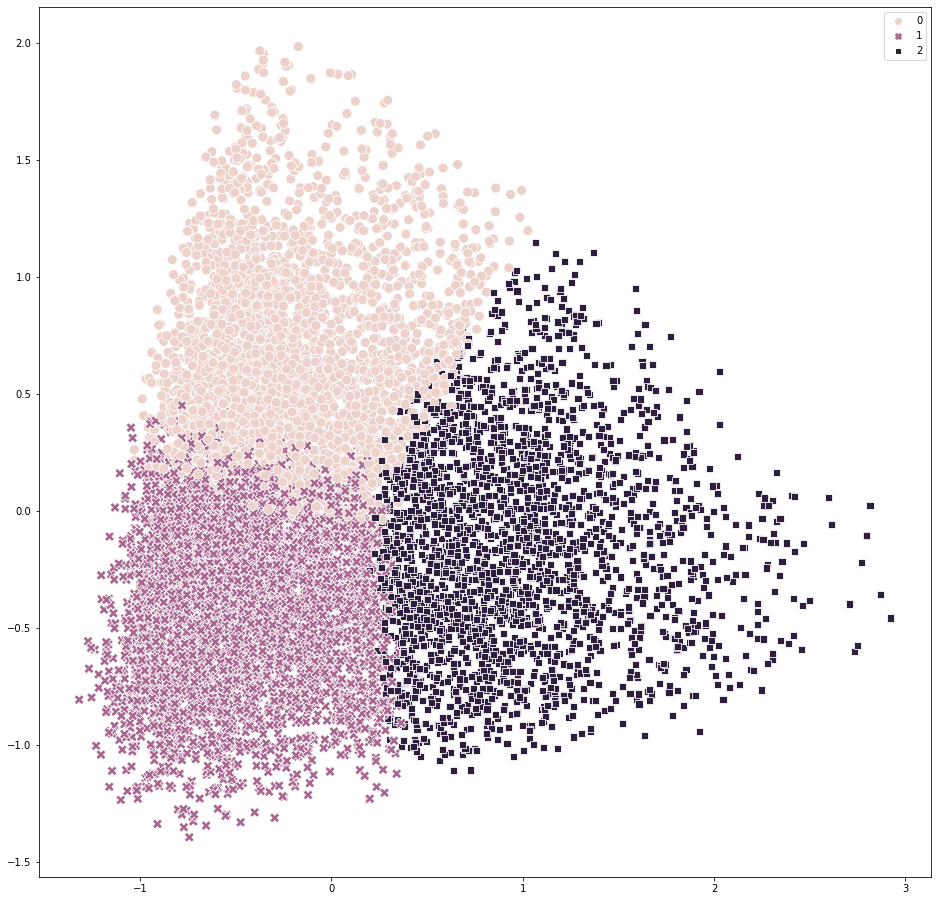

In [ ]:
#시각화!
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (16, 16))
ax = fig.add_subplot(1, 1, 1)

sns.scatterplot(
    pca_vec[:,0],
    pca_vec[:,1],
    s=100,
    color="red",
    hue= km_cluster,
    style= km_cluster
    )

## 2. Agglomerative Clustering

병합군집 클러스터링은 다음과 같은 과정으로 진행됩니다.
1. 모든 데이터를 하나의 군집으로 취급한다.
2. 두 군집을 합치는 방식으로 군집의 숫자를 줄여나간다.
3. 원하는 갯수의 군집수가 남을 때까지 2를 반복한다.

병합군집은 가장 작은 클러스터부터 군집 수를 줄여나가는 방식이기 때문에 predict method가 존재하지 않음

## 3. Spectral Clustering

Parametric-based clustering인 KMeans와 다르게 Graph-based clustering인 스펙트럴 클러스터링은 각 데이터 점들 사이에 선을 긋고(그래프 형태로 만든다) 각 선에 가중치를 주어 그룹으로 만드는 방법.

스펙트럴 클러스터링도 방식에 따라 새로운 데이터에 대한 predict method가 존재하지 않는다.

## 4. Gaussian Mixture

In [ ]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components= 3)
gm_cluster = gm.fit_predict(vectors)

c:\Users\dgfs5\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1152x1152 with 0 Axes>

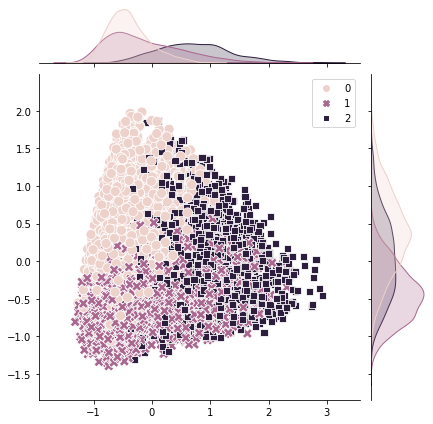

In [ ]:
#시각화!
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (16, 16))

sns.jointplot(
    pca_vec[:,0],
    pca_vec[:,1],
    s=100,
    color="red",
    hue= gm_cluster,
    style= gm_cluster
    )